# **CASA0002 Urban Simulation Assessment**
Last edit: 2024.04.23


___


## **Part 1: London’s underground resilience**

### **I. Topological network**

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations.

#### **I.1 Centrality measures**
Ask: Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in the underground network. Give the definition of each of the measures (including their equation), put the measures into the context of the underground, and why they will allow you to find the stations that are most crucial for the functioning of the underground. Compute the measures for your nodes in the network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.

Answer:

a. Package loading & Data wrangling

b. Three centrality (Degree, betweenness, eigenvector)

##### **a. Package loading & Data wragling**

In [ ]:
# Load packages
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from google.colab import files

In [ ]:
# Read in network data

# Read in London graph from github link
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/LaneyGUO/Urban-Simulation/main/data/london.graph'

# Fetch the content from the URL
response = requests.get(url)
# Ensure the request was successful
response.raise_for_status()

# Load the graph from the fetched data
G = nx.read_graphml(BytesIO(response.content))

# Print some information about graph G
print(type(G))
print(G.number_of_nodes())
print(G.number_of_edges())

<class 'networkx.classes.graph.Graph'>
401
467


In [ ]:
# Print the dataframe to check the node data
df_nodes = pd.DataFrame(G.nodes(data=True))
print(df_nodes.head(10))

                 0                                                  1
0     Wembley Park  {'coords': '(519316.5590174915, 186389.3298165...
1        Kingsbury  {'coords': '(519359.9688603217, 188721.2202725...
2       Queensbury  {'coords': '(518811.3613368616, 189760.5073770...
3      Canons Park  {'coords': '(518183.29968291725, 191257.262608...
4         Stanmore  {'coords': '(517580.4596464033, 192537.9994809...
5        Stratford  {'coords': '(538524.7855297636, 184373.3410082...
6         West Ham  {'coords': '(539160.2577659411, 182933.2900679...
7     Canning Town  {'coords': '(539439.020753582, 181338.40907066...
8  North Greenwich  {'coords': '(539189.2108512281, 179809.6003551...
9     Canary Wharf  {'coords': '(537586.6947649193, 180311.8541939...


In [ ]:
# Check attributes
# To check node attributes
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [ ]:
# Since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
# To check node attributes again
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [ ]:
# Print the dataframe to check the edge data
df_edges = nx.to_pandas_edgelist(G)
print(df_edges[0:10])

         source         target       length  flows     line_name
0  Wembley Park      Kingsbury  2916.771558  12356       Jubilee
1  Wembley Park        Neasden  2353.165938   6744       Jubilee
2  Wembley Park   Preston Road  1419.735166  36601  Metropolitan
3  Wembley Park  Finchley Road  7266.373927  55216  Metropolitan
4     Kingsbury     Queensbury  1245.995234   9419       Jubilee
5    Queensbury    Canons Park  1693.307343   6385       Jubilee
6   Canons Park       Stanmore  1419.669476   3624       Jubilee
7     Stratford       West Ham  1673.509515  91801       Jubilee
8     Stratford       Mile End  2805.001392  12010       Central
9     Stratford         Leyton  2131.342926  56082       Central


In [ ]:
# To check edges attributes
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [ ]:
# Get a list of line_name
# We can see from the list that 'London Overground', 'DLR' and 'TfL Rail' are not included in underground system
unique_line_names = df_edges['line_name'].unique()
print(unique_line_names)

['Jubilee' 'Metropolitan' 'Central' 'London Overground' 'DLR' 'TfL Rail'
 'Hammersmith & City' 'Northern' 'Bakerloo' 'Waterloo & City' 'Circle'
 'Piccadilly' 'Victoria' 'District']


In [ ]:
# Duplicate station check
from collections import Counter

df_nodes_H = pd.DataFrame(G.nodes(data=True))
# Create an empty list to store node names
node_names = []

# Iterate through each row in the DataFrame
for row in df_nodes_H.iterrows():
    # Get the node ID (which serves as the node name)
    node_id = row[1][0]
    # Append the node ID to the list of node names
    node_names.append(node_id)


# Count the occurrences of each node name
name_counts = Counter(node_names)

# Find the duplicate node names
duplicate_names = [name for name, count in name_counts.items() if count > 1]

# Print the duplicate node names
if duplicate_names:
    print("The following node names are duplicated:")
    for name in duplicate_names:
        print(name)
else:
    print("There are no duplicate station node.")

There are no duplicate station node.


##### **b. Three centrality (Degree, betweenness, eigenvector)**

In [ ]:
# Degree Centrality
# Calculate the degree centrality using networkx function
deg_t = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_t), 'Degree_topological')
# Compute the degree for each node
degree = dict(G.degree())
# Set the degree centrality values as node attributes
nx.set_node_attributes(G, degree, 'Degree')

# To dataframe using the nodes as the index
df_degree = pd.DataFrame(index=G.nodes())
df_degree['Degree_topological'] = pd.Series(nx.get_node_attributes(G, 'Degree_topological'))
df_degree['Degree'] = pd.Series(nx.get_node_attributes(G, 'Degree')).values

df_deg_sorted = df_degree.sort_values(["Degree_topological"], ascending=False)
df_deg_sorted[0:10]

,Degree_topological,Degree
Stratford,0.0225,9
Bank and Monument,0.0200,8
King's Cross St. Pancras,0.0175,7
Baker Street,0.0175,7
Earl's Court,0.0150,6
Oxford Circus,0.0150,6
Liverpool Street,0.0150,6
Waterloo,0.0150,6
Green Park,0.0150,6
Canning Town,0.0150,6


<ipython-input-152-bad0e41f43de>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(deg_color), vmax=max(deg_color))),


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

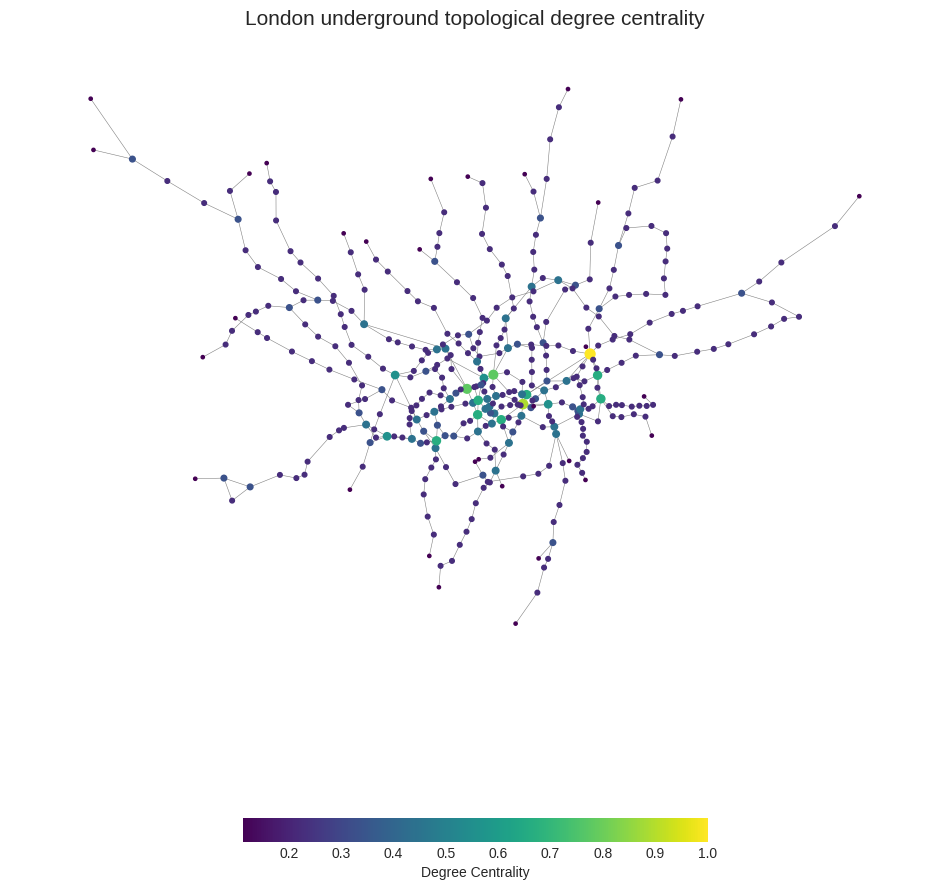

In [ ]:
# Plot graph - London underground degree centrality
# Set colour and size of nodes according to Degree_topological values
degree_values = [i[1]['Degree_topological'] for i in G.nodes(data=True)]
max_degree = max(degree_values)

# Calculate color and size attributes for nodes
deg_color = [(i[1]['Degree_topological'] / max_degree) for i in G.nodes(data=True)]
deg_size = [(i[1]['Degree_topological'] / max_degree) * 50 for i in G.nodes(data=True)]

pos = nx.get_node_attributes(G, 'coords')

fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

# Draw nodes with colors and sizes mapped to attributes
nx.draw_networkx_nodes(G,
                       pos=pos,
                       node_color=deg_color,
                       node_size=deg_size,
                       cmap=plt.cm.viridis,
                       vmin=min(deg_color),
                       vmax=max(deg_color))

# Add colorbar based on node color
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(deg_color), vmax=max(deg_color))),
                     label="Degree Centrality", orientation="horizontal", shrink=0.5)

plt.axis("off")
plt.title("London underground topological degree centrality", fontsize=15)
# Save the image
plt.savefig('I.1-1-Degree centrality.png')

# Download the image
files.download('I.1-1-Degree centrality.png')
plt.show()


In [ ]:
# Betweenness Centrality
# Compute the betweenness centrality for the network
bet_t = nx.betweenness_centrality(G, normalized=False)
# Add these values to the nodes attributes:
nx.set_node_attributes(G, bet_t, 'Betweenness_topological')

# To dataframe using the nodes as the index
df_bet = pd.DataFrame(index=G.nodes())
df_bet['Betweenness_topological'] = pd.Series(nx.get_node_attributes(G, 'Betweenness_topological'))

df_bet_sorted = df_bet.sort_values(["Betweenness_topological"], ascending=False)
df_bet_sorted[0:10]


,Betweenness_topological
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


<ipython-input-154-5de37529cd8d>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(bet_t_color), vmax=max(bet_t_color))),


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

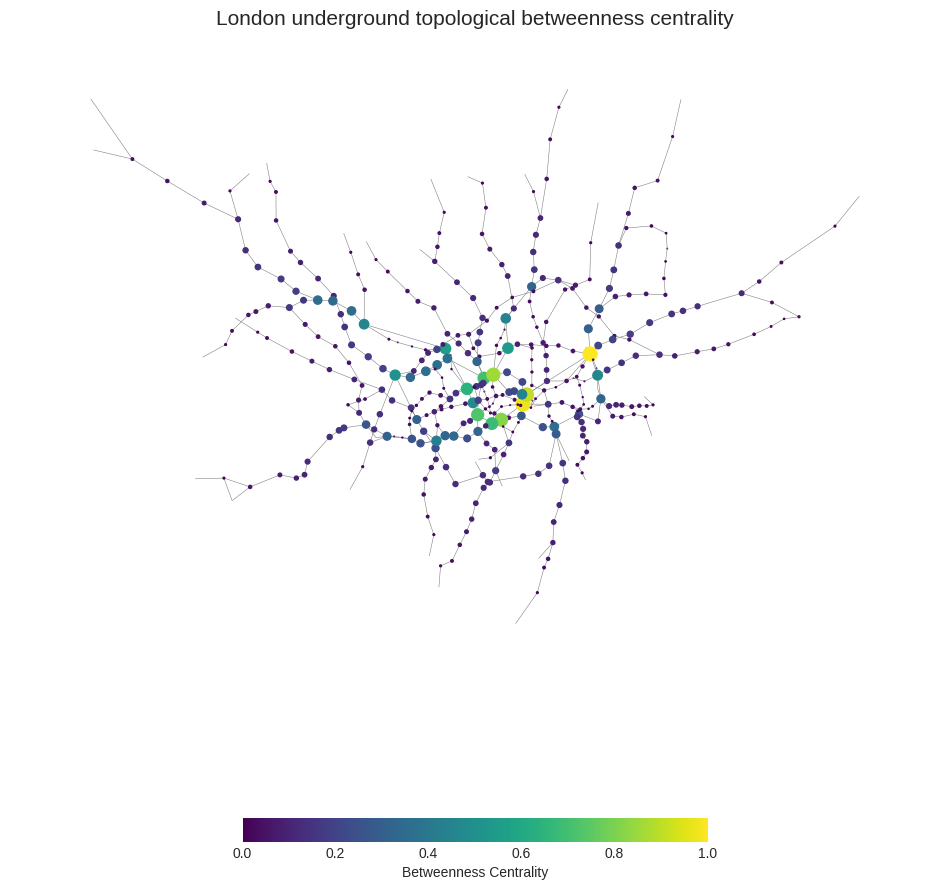

In [ ]:
# Plot graph - London underground betweenness centrality
# Set color and size of nodes according to Betweenness_topological values
betweenness_t_values = [i[1]['Betweenness_topological'] for i in G.nodes(data=True)]
max_betweenness_t = max(betweenness_t_values)

# Calculate color and size attributes for nodes
bet_t_color = [(i[1]['Betweenness_topological'] / max_betweenness_t) for i in G.nodes(data=True)]
bet_t_size = [(i[1]['Betweenness_topological'] / max_betweenness_t) * 100 for i in G.nodes(data=True)]

pos = nx.get_node_attributes(G, 'coords')

fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

# Draw nodes with colors and sizes mapped to attributes
nx.draw_networkx_nodes(G,
                       pos=pos,
                       node_color=bet_t_color,
                       node_size=bet_t_size,
                       cmap=plt.cm.viridis,  # Use viridis color mapping scheme
                       vmin=min(bet_t_color),  # Set minimum value for color mapping
                       vmax=max(bet_t_color))  # Set maximum value for color mapping

# Add colorbar based on node color
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(bet_t_color), vmax=max(bet_t_color))),
                     label="Betweenness Centrality", orientation="horizontal", shrink=0.5)

plt.axis("off")
plt.title("London underground topological betweenness centrality", fontsize=15)
# Save the image
plt.savefig('I.1-2-Betweenness centrality.png')

# Download the image
files.download('I.1-2-Betweenness centrality.png')
plt.show()


In [ ]:
# Eigenvector Centrality
eig_t = nx.eigenvector_centrality(G, max_iter=1000)

# Add these values to the nodes attributes
nx.set_node_attributes(G, eig_t, 'Eigenvector_topological')

# Create DataFrame with 'Station_name' column containing node names
df_eig = pd.DataFrame(index=G.nodes())
df_eig['Eigenvector_topological'] = pd.Series(nx.get_node_attributes(G, 'Eigenvector_topological'))

# Sort DataFrame by 'Eigenvector_topological' column
df_eig_sorted = df_eig.sort_values(["Eigenvector_topological"], ascending=False)
df_eig_sorted[0:10]

,Eigenvector_topological
Bank and Monument,0.383427
Liverpool Street,0.328824
Stratford,0.269179
Waterloo,0.249731
Moorgate,0.215137
Green Park,0.197630
Oxford Circus,0.184094
Tower Hill,0.171676
Westminster,0.168610
Shadwell,0.159090


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

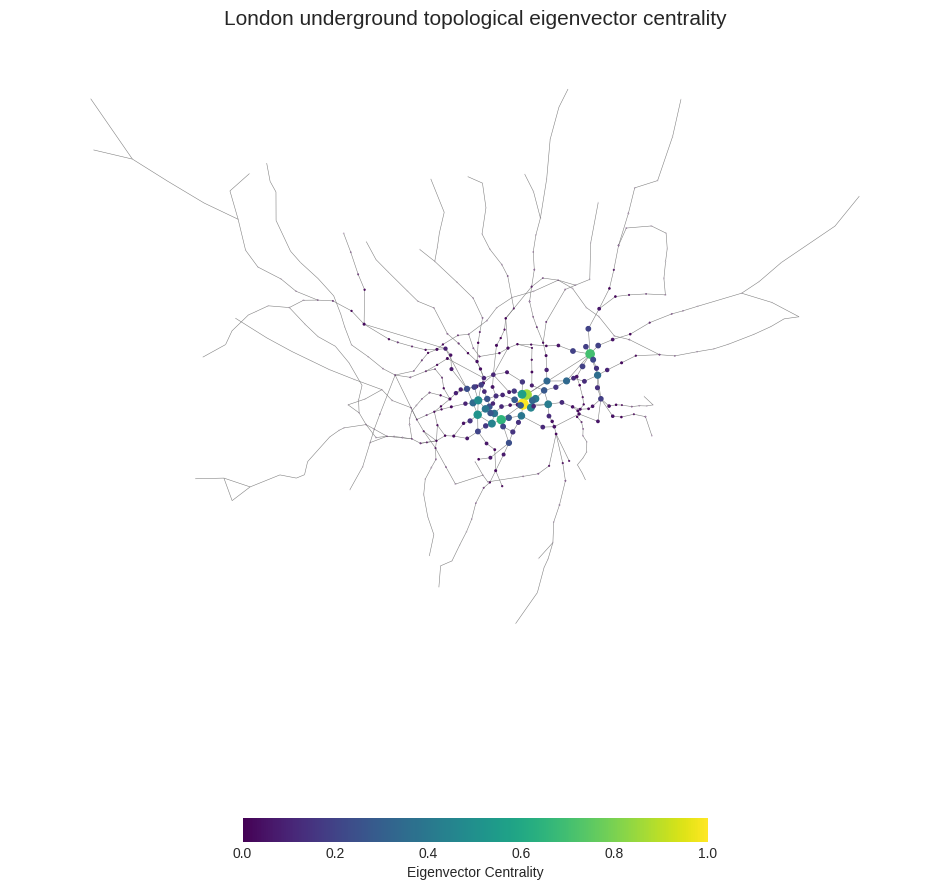

In [ ]:
# Plot graph - London underground topological eigenvector centrality
# Set color and width of nodes according to the eigenvector values
eig_t_val = [i[1]['Eigenvector_topological'] for i in G.nodes(data=True)]

# Normalize eigenvector values to [0, 1]
min_eig_t_val = min(eig_t_val)
max_eig_t_val = max(eig_t_val)
eig_t_color = [(i[1]['Eigenvector_topological'] - min_eig_t_val) / (max_eig_t_val - min_eig_t_val) for i in G.nodes(data=True)]
eig_t_size = [((i[1]['Eigenvector_topological'] - min_eig_t_val) / (max_eig_t_val - min_eig_t_val)) * 50 for i in G.nodes(data=True)]


fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

# Draw nodes with colors and sizes mapped to attributes
nod = nx.draw_networkx_nodes(G,
                              pos=pos,
                              node_color=eig_t_color,
                              node_size=eig_t_size,
                              cmap=plt.cm.viridis)

# Add colorbar based on node color
plt.colorbar(nod, label="Eigenvector Centrality", orientation="horizontal", shrink=0.5)

plt.axis("off")
plt.title("London underground topological eigenvector centrality", fontsize=15)

# Save the image
plt.savefig('I.1-3-Eigenvectore centrality.png')

# Download the image
files.download('I.1-3-Eigenvectore centrality.png')

plt.show()


#### **I.2 Impact measures**
Ask: Find 2 different measures to evaluate the impact of the node removal on the network. These need to be global measures referring to the whole network and not to specific nodes or links. Explain whether these two measures are specific to the London underground, or whether they could also be used to evaluate the resilience of any other network.

Answer:

a. measure 1 - Largest connected component proportion

b. measure 2 - Global efficiency

##### **a. measure 1 - Largest connected component proportion**

In [ ]:
# Define cal_largest_comp function to calculate LCC(Largest connected component) and %LCC(Largest connected component proportion)
def cal_largest_comp(G1, G2):
    # Get the list of connected components
    components = nx.connected_components(G2)
    # Find the largest connected component
    largest_component = max(components, key=len)
    # Create a subgraph of the largest connected component
    Largest_subgraph = G2.subgraph(largest_component)
    # Calculate the size of the largest connected component
    larg_size = Largest_subgraph.number_of_nodes()
    # Calculate the proportion of the largest connected component in G1
    larg_prop = larg_size / G1.number_of_nodes() * 100

    return larg_size, larg_prop

##### **b. measure 2 - Global Efficiency**

In [ ]:
# Define cal_global_efficiency function to calculate Global Efficiency
def cal_global_efficiency(G):
    glb_eff = nx.global_efficiency(G)
    return glb_eff

#### **I.3 Node removal**
Ask: For each of the centrality measures selected in I.1. remove at least 10 nodes following two different strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes.

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality measure reflects better the importance of a station for the functioning of the underground, which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal.

Answer:

a. non-sequential removal

b. sequential removal

c. plot results

##### **a. non-sequential removal**

**result lists:**

Degree centrality: df_non_deg, G_non_deg

Betweenness centrality: df_non_bet, G_non_bet

Eigenvector centrality: df_non_eig, G_non_eig

In [ ]:
# Degree centrality
# Create a new copy of Graph G
G_non_deg = G.copy()

# Create an empty DataFrame
df_non_deg = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_non_deg)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_non_deg)
# Assign the first row
df_non_deg.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]


# Get the identifiers of the top 10 nodes
top_10_nodes = df_deg_sorted.head(10).index.tolist()
# Remove nodes one by one
for i, node in enumerate(top_10_nodes):
    # Check if the node exists in the graph
    if node in G_non_deg:
        # Remove the node from the graph
        G_non_deg.remove_node(node)
        # Print the removed node's identifier
        print("Removed node", node, "- successfully")
    else:
        print("Node", node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_non_deg)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_non_deg)

    # Fill the results into the DataFrame
    df_non_deg.loc[i + 1] = [i + 1, node, larg_size, larg_prop, glb_eff]

df_non_deg


Removed node Stratford - successfully
Removed node Bank and Monument - successfully
Removed node King's Cross St. Pancras - successfully
Removed node Baker Street - successfully
Removed node Earl's Court - successfully
Removed node Oxford Circus - successfully
Removed node Liverpool Street - successfully
Removed node Waterloo - successfully
Removed node Green Park - successfully
Removed node Canning Town - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Stratford,379,94.513716,0.088917
2,2,Bank and Monument,378,94.264339,0.085862
3,3,King's Cross St. Pancras,377,94.014963,0.080287
4,4,Baker Street,374,93.266833,0.075700
5,5,Earl's Court,373,93.017456,0.074036
6,6,Oxford Circus,371,92.518703,0.072745
7,7,Liverpool Street,365,91.022444,0.070948
8,8,Waterloo,364,90.773067,0.068982
9,9,Green Park,363,90.523691,0.068257


In [ ]:
# Betweenness centrality
G_non_bet = G.copy()

# Create an empty DataFrame
df_non_bet = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_non_bet)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_non_bet)
# Assign the first row
df_non_bet.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]


# Get the identifiers of the top 10 nodes
top_10_nodes = df_bet_sorted.head(10).index.tolist()
# Remove nodes one by one
for i, node in enumerate(top_10_nodes):
    # Check if the node exists in the graph
    if node in G_non_bet:
        # Remove the node from the graph
        G_non_bet.remove_node(node)
        # Print the removed node's identifier
        print("Removed node", node, "- successfully")
    else:
        print("Node", node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_non_bet)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_non_bet)

    # Fill the results into the DataFrame
    df_non_bet.loc[i + 1] = [i + 1, node, larg_size, larg_prop, glb_eff]

df_non_bet

Removed node Stratford - successfully
Removed node Bank and Monument - successfully
Removed node Liverpool Street - successfully
Removed node King's Cross St. Pancras - successfully
Removed node Waterloo - successfully
Removed node Green Park - successfully
Removed node Euston - successfully
Removed node Westminster - successfully
Removed node Baker Street - successfully
Removed node Finchley Road - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Stratford,379,94.513716,0.088917
2,2,Bank and Monument,378,94.264339,0.085862
3,3,Liverpool Street,377,94.014963,0.084963
4,4,King's Cross St. Pancras,371,92.518703,0.078498
5,5,Waterloo,370,92.269327,0.075942
6,6,Green Park,369,92.019950,0.074152
7,7,Euston,346,86.284289,0.068206
8,8,Westminster,345,86.034913,0.067660
9,9,Baker Street,342,85.286783,0.064700


In [ ]:
# Eigenvector centrality
G_non_eig = G.copy()

# Create an empty DataFrame
df_non_eig = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_non_eig)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_non_eig)
# Assign the first row
df_non_eig.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]


# Get the identifiers of the top 10 nodes
top_10_nodes = df_eig_sorted.head(10).index.tolist()
# Remove nodes one by one
for i, node in enumerate(top_10_nodes):
    # Check if the node exists in the graph
    if node in G_non_eig:
        # Remove the node from the graph
        G_non_eig.remove_node(node)
        # Print the removed node's identifier
        print("Removed node", node, "- successfully")
    else:
        print("Node", node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_non_eig)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_non_eig)

    # Fill the results into the DataFrame
    df_non_eig.loc[i + 1] = [i + 1, node, larg_size, larg_prop, glb_eff]

df_non_eig

Removed node Bank and Monument - successfully
Removed node Liverpool Street - successfully
Removed node Stratford - successfully
Removed node Waterloo - successfully
Removed node Moorgate - successfully
Removed node Green Park - successfully
Removed node Oxford Circus - successfully
Removed node Tower Hill - successfully
Removed node Westminster - successfully
Removed node Shadwell - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Bank and Monument,400,99.750623,0.096735
2,2,Liverpool Street,399,99.501247,0.094668
3,3,Stratford,377,94.014963,0.084963
4,4,Waterloo,376,93.765586,0.082797
5,5,Moorgate,375,93.516209,0.082749
6,6,Green Park,374,93.266833,0.080953
7,7,Oxford Circus,373,93.017456,0.080104
8,8,Tower Hill,371,92.518703,0.079741
9,9,Westminster,370,92.269327,0.079100


##### **b. sequential removal**

**result lists:**

Degree centrality: df_seq_deg, G_seq_deg

Betweenness centrality: df_seq_bet, G_seq_bet

Eigenvector centrality: df_seq_eig, G_seq_eig

In [ ]:
# Degree centrality - sequential removal
G_seq_deg = G.copy()

# Create an empty DataFrame
df_seq_deg = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_seq_deg)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_seq_deg)
# Assign the first row
df_seq_deg.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]



# Remove nodes one by one
for i in range(10):
    # Recalculate Eigenvector Centrality
    deg_t_temp = nx.degree_centrality(G_seq_deg)
    # Find the node with the largest Eigenvector Centrality value
    max_deg_node = max(deg_t_temp, key=deg_t_temp.get)

    # Check if the node exists in the graph
    if max_deg_node in G_seq_deg:
        # Remove the node from the graph
        G_seq_deg.remove_node(max_deg_node)
        # Print the removed node's identifier
        print("Removed node", max_deg_node, "- successfully")
    else:
        print("Node", max_deg_node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_seq_deg)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_seq_deg)

    # Fill the results into the DataFrame
    df_seq_deg.loc[i + 1] = [i + 1, max_deg_node, larg_size, larg_prop, glb_eff]

df_seq_deg

Removed node Stratford - successfully
Removed node Bank and Monument - successfully
Removed node Baker Street - successfully
Removed node King's Cross St. Pancras - successfully
Removed node Canning Town - successfully
Removed node Green Park - successfully
Removed node Earl's Court - successfully
Removed node Waterloo - successfully
Removed node Oxford Circus - successfully
Removed node Willesden Junction - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Stratford,379,94.513716,0.088917
2,2,Bank and Monument,378,94.264339,0.085862
3,3,Baker Street,377,94.014963,0.082033
4,4,King's Cross St. Pancras,374,93.266833,0.075700
5,5,Canning Town,360,89.775561,0.070396
6,6,Green Park,359,89.526185,0.069402
7,7,Earl's Court,358,89.276808,0.067772
8,8,Waterloo,357,89.027431,0.065936
9,9,Oxford Circus,355,88.528678,0.065069


In [ ]:
# Betweenness centrality - sequential removal
G_seq_bet = G.copy()

# Create an empty DataFrame
df_seq_bet = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_seq_bet)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_seq_bet)
# Assign the first row
df_seq_bet.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]


# Remove nodes one by one
for i in range(10):
    # Recalculate Betweenness Centrality
    bet_t_temp = nx.betweenness_centrality(G_seq_bet, normalized = False)
    # Find the node with the largest Betweenness Centrality value
    max_bet_node = max(bet_t_temp, key=bet_t_temp.get)

    # Check if the node exists in the graph
    if max_bet_node in G_seq_bet:
        # Remove the node from the graph
        G_seq_bet.remove_node(max_bet_node)
        # Print the removed node's identifier
        print("Removed node", max_bet_node, "- successfully")
    else:
        print("Node", max_bet_node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_seq_bet)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_seq_bet)

    # Fill the results into the DataFrame
    df_seq_bet.loc[i + 1] = [i + 1, max_bet_node, larg_size, larg_prop, glb_eff]

df_seq_bet

Removed node Stratford - successfully
Removed node King's Cross St. Pancras - successfully
Removed node Waterloo - successfully
Removed node Bank and Monument - successfully
Removed node Canada Water - successfully
Removed node West Hampstead - successfully
Removed node Earl's Court - successfully
Removed node Shepherd's Bush - successfully
Removed node Euston - successfully
Removed node Baker Street - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Stratford,379,94.513716,0.088917
2,2,King's Cross St. Pancras,378,94.264339,0.084603
3,3,Waterloo,377,94.014963,0.081829
4,4,Bank and Monument,376,93.765586,0.077678
5,5,Canada Water,375,93.516209,0.072832
6,6,West Hampstead,227,56.608479,0.053210
7,7,Earl's Court,226,56.359102,0.051656
8,8,Shepherd's Bush,196,48.877805,0.045844
9,9,Euston,173,43.142145,0.041631


In [ ]:
# Eigenvector centrality - sequential removal
G_seq_eig = G.copy()

# Create an empty DataFrame
df_seq_eig = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Largest connected component size', 'Largest connected component proportion', 'Global efficiency'])
# Calculate original largest connected component size and proportion
larg_size_0, larg_prop_0 = cal_largest_comp(G, G_seq_eig)
# Calculate original global efficiency
glb_eff_0 = cal_global_efficiency(G_seq_eig)
# Assign the first row
df_seq_eig.loc[0] = [0, 'N/A', larg_size_0, larg_prop_0, glb_eff_0]



# Remove nodes one by one
for i in range(10):
    # Recalculate Eigenvector Centrality
    eig_t_temp = nx.eigenvector_centrality(G_seq_eig, max_iter=1000)
    # Find the node with the largest Eigenvector Centrality value
    max_eig_node = max(eig_t_temp, key=eig_t_temp.get)

    # Check if the node exists in the graph
    if max_eig_node in G_seq_eig:
        # Remove the node from the graph
        G_seq_eig.remove_node(max_eig_node)
        # Print the removed node's identifier
        print("Removed node", max_eig_node, "- successfully")
    else:
        print("Node", max_eig_node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    larg_size, larg_prop = cal_largest_comp(G, G_seq_eig)
    # Measure 2 - calculate_global_efficiency
    glb_eff = cal_global_efficiency(G_seq_eig)

    # Fill the results into the DataFrame
    df_seq_eig.loc[i + 1] = [i + 1, max_eig_node, larg_size, larg_prop, glb_eff]

df_seq_eig

Removed node Bank and Monument - successfully
Removed node Oxford Circus - successfully
Removed node Stratford - successfully
Removed node Earl's Court - successfully
Removed node Westminster - successfully
Removed node Baker Street - successfully
Removed node King's Cross St. Pancras - successfully
Removed node Canning Town - successfully
Removed node Turnham Green - successfully
Removed node Leicester Square - successfully


,Accumulated Removal Points,Removed Node,Largest connected component size,Largest connected component proportion,Global efficiency
0,0,N/A,401,100.000000,0.101256
1,1,Bank and Monument,400,99.750623,0.096735
2,2,Oxford Circus,399,99.501247,0.095722
3,3,Stratford,377,94.014963,0.084813
4,4,Earl's Court,376,93.765586,0.083369
5,5,Westminster,375,93.516209,0.082412
6,6,Baker Street,373,93.017456,0.078219
7,7,King's Cross St. Pancras,370,92.269327,0.072074
8,8,Canning Town,356,88.778055,0.066899
9,9,Turnham Green,355,88.528678,0.065458


##### **c. plot removal results (topological centralities)**

**result lists:**

I.3-1-Topological centralities removal-%LCC.png

I.3-2-Topological centralities removal-Global efficiency.png

<ipython-input-94-0a0c178da134>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

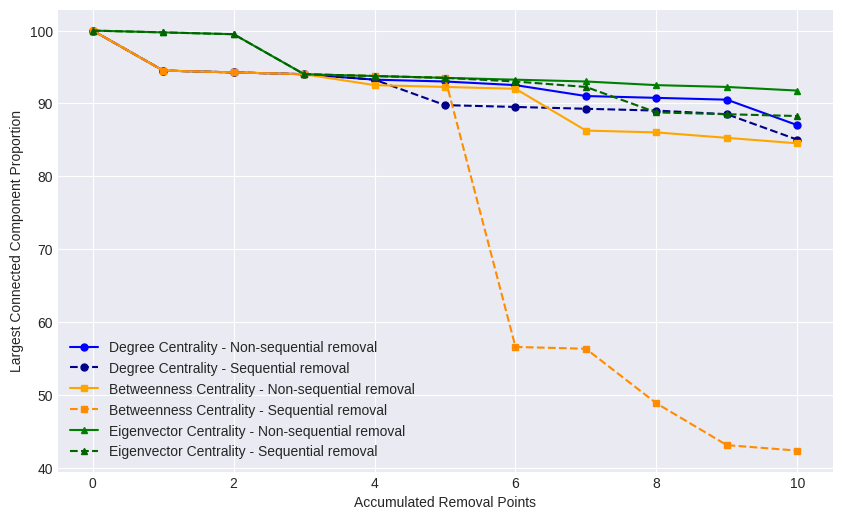

In [ ]:
# Plot all 6 lines' %LCC(Largest connected component proportion) - non-sequential and sequential
from google.colab import files
# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plot the lines - Degree Centrality
plt.plot(df_non_deg['Accumulated Removal Points'], df_non_deg['Largest connected component proportion'], marker='o', markersize=5, linestyle='-', color='blue')
plt.plot(df_seq_deg['Accumulated Removal Points'], df_seq_deg['Largest connected component proportion'], marker='o', markersize=5, linestyle='--', color='darkblue')  # Adjust color depth

# Plot the lines - Betweenness Centrality
plt.plot(df_non_bet['Accumulated Removal Points'], df_non_bet['Largest connected component proportion'], marker='s', markersize=5, linestyle='-', color='orange')
plt.plot(df_seq_bet['Accumulated Removal Points'], df_seq_bet['Largest connected component proportion'], marker='s', markersize=5, linestyle='--', color='darkorange')  # Adjust color depth

# Plot the lines - Eigenvector Centrality
plt.plot(df_non_eig['Accumulated Removal Points'], df_non_eig['Largest connected component proportion'], marker='^', markersize=5, linestyle='-', color='green')
plt.plot(df_seq_eig['Accumulated Removal Points'], df_seq_eig['Largest connected component proportion'], marker='^', markersize=5, linestyle='--', color='darkgreen')  # Adjust color depth

# Add legends
plt.legend(['Degree Centrality - Non-sequential removal', 'Degree Centrality - Sequential removal',
            'Betweenness Centrality - Non-sequential removal', 'Betweenness Centrality - Sequential removal',
            'Eigenvector Centrality - Non-sequential removal', 'Eigenvector Centrality - Sequential removal'], loc='best')

# Add title and labels
# plt.title('Largest Connected Component Proportion vs. Accumulated Removal Points')
plt.xlabel('Accumulated Removal Points')
plt.ylabel('Largest Connected Component Proportion')

# Save the image
plt.savefig('I.3-1-Topological centralities removal-%LCC.png')

# Download the image
files.download('I.3-1-Topological centralities removal-%LCC.png')

# Show the graph
plt.show()

<ipython-input-95-cb367e95b65b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

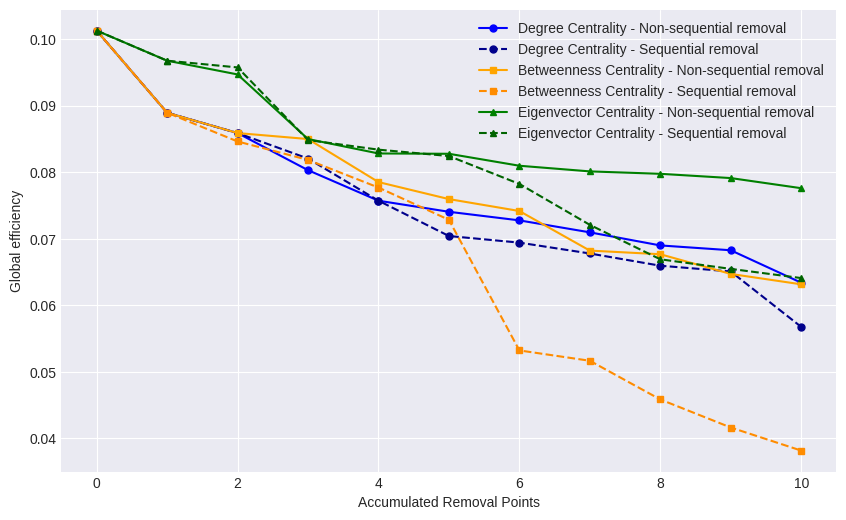

In [ ]:
# Plot all 6 lines' Global efficiency - non-sequential and sequential
from google.colab import files
# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plot the lines - Degree Centrality
plt.plot(df_non_deg['Accumulated Removal Points'], df_non_deg['Global efficiency'], marker='o', markersize=5, linestyle='-', color='blue')
plt.plot(df_seq_deg['Accumulated Removal Points'], df_seq_deg['Global efficiency'], marker='o', markersize=5, linestyle='--', color='darkblue')  # Adjust color depth

# Plot the lines - Betweenness Centrality
plt.plot(df_non_bet['Accumulated Removal Points'], df_non_bet['Global efficiency'], marker='s', markersize=5, linestyle='-', color='orange')
plt.plot(df_seq_bet['Accumulated Removal Points'], df_seq_bet['Global efficiency'], marker='s', markersize=5, linestyle='--', color='darkorange')  # Adjust color depth

# Plot the lines - Eigenvector Centrality
plt.plot(df_non_eig['Accumulated Removal Points'], df_non_eig['Global efficiency'], marker='^', markersize=5, linestyle='-', color='green')
plt.plot(df_seq_eig['Accumulated Removal Points'], df_seq_eig['Global efficiency'], marker='^', markersize=5, linestyle='--', color='darkgreen')  # Adjust color depth

# Add legends
plt.legend(['Degree Centrality - Non-sequential removal', 'Degree Centrality - Sequential removal',
            'Betweenness Centrality - Non-sequential removal', 'Betweenness Centrality - Sequential removal',
            'Eigenvector Centrality - Non-sequential removal', 'Eigenvector Centrality - Sequential removal'], loc='best')

# Add title and labels
# plt.title('Largest Connected Component Proportion vs. Accumulated Removal Points')
plt.xlabel('Accumulated Removal Points')
plt.ylabel('Global efficiency')

# Save the image
plt.savefig('I.3-2-Topological centralities removal-Global efficiency.png')

# Download the image
files.download('I.3-2-Topological centralities removal-Global efficiency.png')

# Show the graph
plt.show()

### **II. Flows: weighted network**

In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the flows of passengers were assigned to the links between stations.


**II.1**

Ask: Consider the centrality measure derived in I. indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?

Answer:

In [ ]:
# Calculate the weighted values - reciprocal of flows
# Iterate over each edge in the graph G
for u, v, data in G.edges(data=True):
    # Retrieve the flows value for the edge
    flows = data['flows']

    # Calculate the reciprocal of the flows value
    if flows != 0:
        weight_flows = 1 / flows
    else:
        # If flows is 0, set weight_flows to infinity
        weight_flows = 1 / (flows + 0.0001)

    # Add the weight_flows attribute directly to the edge in the graph G
    G[u][v]['weight_flows'] = weight_flows
# Check edge attributes
list(G.edges(data = True))[0:2]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'weight_flows': 8.09323405632891e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'weight_flows': 0.0001482799525504152})]

In [ ]:
# Weighted degree centrality
# Calculate the degree centrality using networkx function
deg_w = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_w), 'Degree_w')
# Compute the degree for each node
degree = dict(G.degree())
# Set the degree centrality values as node attributes
nx.set_node_attributes(G, degree, 'Degree')

# To dataframe using the nodes as the index
df_deg_w = pd.DataFrame(index=G.nodes())
df_deg_w['Degree_w'] = pd.Series(nx.get_node_attributes(G, 'Degree_w')).values

df_deg_w_sorted = df_deg_w.sort_values(["Degree_w"], ascending=False)
df_deg_w_sorted[0:10]

,Degree_w
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [ ]:
# Weighted betweenness centrality
# Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_w = nx.betweenness_centrality(G, weight='weight_flows', normalized=True)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G, bet_w, 'Betweenness_w')

# To dataframe using the nodes as the index
df_bet_w = pd.DataFrame(index = G.nodes())
df_bet_w['Betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'Betweenness_w')).values

df_bet_w_sorted = df_bet_w.sort_values(["Betweenness_w"], ascending=False)
df_bet_w_sorted[0:10]

,Betweenness_w
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


In [ ]:
# Eigenvector Centrality
eig_w = nx.eigenvector_centrality_numpy(G, weight='weight_flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G, eig_w, 'Eigenvector_w')

# To ataframe using the nodes as the index
df_eig_w = pd.DataFrame(index = G.nodes())
df_eig_w['Eigenvector_w'] = pd.Series(nx.get_node_attributes(G, 'Eigenvector_w')).values

df_eig_w_sorted = df_eig_w.sort_values(["Eigenvector_w"], ascending=False)
df_eig_w_sorted[0:10]

,Eigenvector_w
Nine Elms,7.071068e-01
Battersea Power Station,5.000000e-01
Kennington,5.000000e-01
Elephant & Castle,1.885517e-09
Oval,5.458345e-10
Waterloo,5.342946e-10
Lambeth North,1.454145e-15
Wandsworth Road,2.745867e-16
Battersea Park,2.296091e-16
Highams Park,4.420941e-17


II.2

Ask: Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers.

Answer:

a. LCC -> Average Weighted Shortest Path Length

b. Global efficiency -> Weighted Global Efficiency

##### **a. LCC(Large connected component) -> Average Weighted Shortest Path Length**

Adjusted method: change to another one

Reason: LCC only cares about whether the graph is connected or not, i.e., it is sufficient to have an edge between two points, and does not concern itself with the weights on the edges. So LCC is not applicable to measure weighted networks.

In [ ]:
# New measure - average weighted shortest path length (AWSPL)
def calculate_average_weighted_shortest_path_length(G):
    total_weighted_shortest_paths = 0
    total_paths = 0

    for source_node in G.nodes():
        # Calculate the shortest paths from the source node to other nodes
        shortest_paths = nx.single_source_dijkstra_path_length(G, source_node, weight='weight_flows')

        # Count the total number of shortest paths and their total length
        for target_node, path_length in shortest_paths.items():
            if source_node != target_node:  # Exclude paths from the source node to itself
                total_weighted_shortest_paths += path_length
                total_paths += 1

    # Calculate the average weighted shortest path length
    average_weighted_shortest_path = total_weighted_shortest_paths / total_paths if total_paths != 0 else float('inf')

    print("Successfully calculate average_weighted_shortest_path")
    return average_weighted_shortest_path

In [ ]:
# Try function of average weighted shortest path
awspl = calculate_average_weighted_shortest_path_length(G)
awspl

Successfully calculate average_weighted_shortest_path


199.2526818153759

##### **b. Global efficiency -> Weighted Global efficiency**

Adjusted method: introduce flows as weighted to the calculation process of Global efficiency

Reason: One step in the process of calculating Global Efficiency involves calculating the shortest paths, and introducing flows in this step to make it calculate the shortest paths of the weighted network enables the conversion of the metric to Weighted Global Effieciency.


In [ ]:
# Adjusted Global Efficiency
# Definition of the calculate_sum_reciprocal_of_weighted_shortestpath function
def calculate_sum_reciprocal_of_weighted_shortestpath(G):
    total_weighted_path_length = 0
    total_weighted_path_count = 0

    # Traverse all pairs of nodes
    for source in G.nodes():
        for target in G.nodes():
            if source != target:
                try:
                    # Calculate the weighted shortest path length of the graph using single-source Dijkstra algorithm, where weight_flows are the weights
                    weighted_shortest_path_lengths = nx.single_source_dijkstra(G, source=source, weight='weight_flows')[0]
                    # Get the weighted shortest path length of the target node
                    weighted_shortest_path_length = weighted_shortest_path_lengths.get(target)
                    if weighted_shortest_path_length is not None:
                        # Add the reciprocal of the weighted shortest path length to the total sum
                        total_weighted_path_length += 1 / weighted_shortest_path_length
                        # Increase the count of weighted paths
                        total_weighted_path_count += 1
                except nx.NetworkXNoPath:
                    # If there is no path connecting this pair of nodes, continue to the next pair of nodes
                    continue
    return total_weighted_path_length, total_weighted_path_count


# Definition of the calculate_weighted_global_efficiency function
def calculate_weighted_global_efficiency(G):
    # Check if the network is connected after removing nodes
    if nx.is_connected(G):
        # If the network is connected, calculate the weighted global efficiency
        # Calculate the sum of reciprocals of weighted shortest paths and the number of shortest paths
        total_weighted_path_length, total_weighted_path_count = calculate_sum_reciprocal_of_weighted_shortestpath(G)

        # Calculate the weighted global efficiency
        if total_weighted_path_count > 0:
            weighted_global_efficiency = total_weighted_path_length / total_weighted_path_count
        else:
            weighted_global_efficiency = 0
    else:
        # If the network is not connected, return None
        return None
    print("Successfully calculate weighted_global_efficiency")
    return weighted_global_efficiency


II.3

Ask: Remove only the 3 highest ranked nodes according to the best performing centrality measure found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the highest 3 ranked nodes using the adjusted measure. Critically discuss which station closure will have the largest impact on passengers, referring to your measures and results.

**result list**

Weighted betweenness centrality:

- non-sequential removal: df_non_bet_w, G_non_bet_w

- sequential removal: df_seq_bet_w, G_seq_bet_w

In [ ]:
# Weighted betweenness centrality - non-sequential removal
G_non_bet_w = G.copy()

# Create an empty DataFrame
df_non_bet_w = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Average Weighted Shortest Path Length', 'Weighted Global efficiency'])
# Calculate original largest connected component proportion
w_av_shor_path_len_0 = calculate_average_weighted_shortest_path_length(G_non_bet_w)
# Calculate original global efficiency
w_glb_eff_0 = calculate_weighted_global_efficiency(G_non_bet_w)
# Assign the first row
df_non_bet_w.loc[0] = [0, 'N/A', w_av_shor_path_len_0, w_glb_eff_0]


# Get the identifiers of the top 3 nodes
top_3_nodes = df_bet_w_sorted.head(3).index.tolist()
# Remove nodes one by one
for i, node in enumerate(top_3_nodes):
    # Check if the node exists in the graph
    if node in G_non_bet_w:
        # Remove the node from the graph
        G_non_bet_w.remove_node(node)
        # Print the removed node's identifier
        print("Removed node", node, "- successfully")
    else:
        print("Node", node, "not found in the graph.")

    # Measure 1 - calculate_largest_component
    w_av_shor_path_len = calculate_average_weighted_shortest_path_length(G_non_bet_w)
    # Measure 2 - calculate_global_efficiency
    w_glb_eff = calculate_weighted_global_efficiency(G_non_bet_w)

    # Fill the results into the DataFrame
    df_non_bet_w.loc[i + 1] = [i + 1, node, w_av_shor_path_len, w_glb_eff]

df_non_bet_w

Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node Green Park - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node Bank and Monument - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node Waterloo - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency


,Accumulated Removal Points,Removed Node,Average Weighted Shortest Path Length,Weighted Global efficiency
0,0,N/A,199.252682,2648.721157
1,1,Green Park,199.750213,2387.102324
2,2,Bank and Monument,200.250257,2062.540985
3,3,Waterloo,200.752835,1970.779071


In [ ]:
# Weighted betweenness centrality - sequential removal
G_seq_bet_w = G.copy()

# Create an empty DataFrame
df_seq_bet_w = pd.DataFrame(columns=['Accumulated Removal Points', 'Removed Node', 'Average Weighted Shortest Path Length', 'Weighted Global efficiency'])
# Calculate original largest connected component proportion
w_av_shor_path_len_0 = calculate_average_weighted_shortest_path_length(G_seq_bet_w)
# Calculate original global efficiency
glb_eff_0 = calculate_weighted_global_efficiency(G_seq_bet_w)
# Assign the first row
df_seq_bet_w.loc[0] = [0, 'N/A', w_av_shor_path_len_0, glb_eff_0]


# Remove nodes one by one
for i in range(3):
    # Recalculate Weighted Betweenness Centrality
    bet_w_temp = nx.betweenness_centrality(G_seq_bet_w, weight='weight_flows', normalized = False)
    # Find the node with the largest Eigenvector Centrality value
    max_bet_w_node = max(bet_w_temp, key=bet_w_temp.get)

    # Check if the node exists in the graph
    if max_bet_w_node in G_seq_bet_w:
        # Remove the node from the graph
        G_seq_bet_w.remove_node(max_bet_w_node)
        # Print the removed node's identifier
        print("Removed node", max_bet_w_node, "- successfully")
    else:
        print("Node", max_bet_w_node, "not found in the graph.")

    # Measure 1 - calculate_average_weighted_shortest_path
    w_av_shor_path_len = calculate_average_weighted_shortest_path_length(G_seq_bet_w)
    # Measure 2 - calculate_weighted_global_efficiency
    w_glb_eff = calculate_weighted_global_efficiency(G_seq_bet_w)

    # Fill the results into the DataFrame
    df_seq_bet_w.loc[i + 1] = [i + 1, max_bet_w_node, w_av_shor_path_len, w_glb_eff]

df_seq_bet_w

Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node Green Park - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node Bank and Monument - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency
Removed node King's Cross St. Pancras - successfully
Successfully calculate average_weighted_shortest_path
Successfully calculate weighted_global_efficiency


,Accumulated Removal Points,Removed Node,Average Weighted Shortest Path Length,Weighted Global efficiency
0,0,N/A,199.252682,2648.721157
1,1,Green Park,199.750213,2387.102324
2,2,Bank and Monument,200.250257,2062.540985
3,3,King's Cross St. Pancras,200.752919,1699.797679


<ipython-input-150-728e417f8a87>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

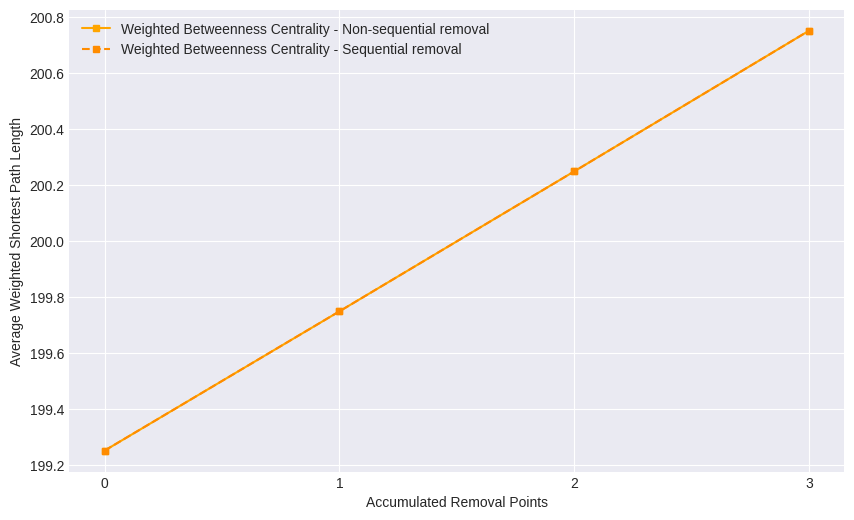

In [ ]:
# Plot the removal results of Average Weighted Shortest Path Length
# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plot the lines - Weighted Betweenness Centrality
plt.plot(df_non_bet_w['Accumulated Removal Points'], df_non_bet_w['Average Weighted Shortest Path Length'], marker='s', markersize=5, linestyle='-', color='orange')
plt.plot(df_seq_bet_w['Accumulated Removal Points'], df_seq_bet_w['Average Weighted Shortest Path Length'], marker='s', markersize=5, linestyle='--', color='darkorange')

# Add legends
plt.legend(['Weighted Betweenness Centrality - Non-sequential removal', 'Weighted Betweenness Centrality - Sequential removal'], loc='best')

# Add title and labels
# plt.title('Largest Connected Component Proportion vs. Accumulated Removal Points')
plt.xlabel('Accumulated Removal Points')
plt.ylabel('Average Weighted Shortest Path Length')

# Set x-axis ticks as integers
plt.xticks(np.arange(min(df_non_bet_w['Accumulated Removal Points']), max(df_non_bet_w['Accumulated Removal Points'])+1, 1))

# Save the image
plt.savefig('II.3-1-Weighted betweenness centrality removal-Average Weighted Shortest Path Length.png')

# Download the image
files.download('II.3-1-Weighted betweenness centrality removal-Average Weighted Shortest Path Length.png')

# Show the graph
plt.show()

<ipython-input-151-f4565b3c70a3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

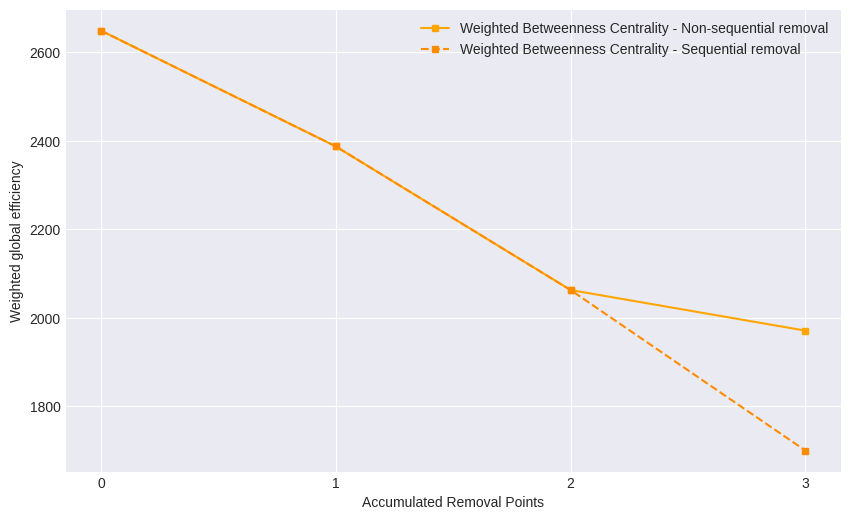

In [ ]:
# Plot the removal results of Weighted Global efficiency
from google.colab import files
# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plot the lines - Weighted Betweenness Centrality
plt.plot(df_non_bet_w['Accumulated Removal Points'], df_non_bet_w['Weighted Global efficiency'], marker='s', markersize=5, linestyle='-', color='orange')
plt.plot(df_seq_bet_w['Accumulated Removal Points'], df_seq_bet_w['Weighted Global efficiency'], marker='s', markersize=5, linestyle='--', color='darkorange')

# Add legends
plt.legend(['Weighted Betweenness Centrality - Non-sequential removal', 'Weighted Betweenness Centrality - Sequential removal'], loc='best')

# Add title and labels
# plt.title('Largest Connected Component Proportion vs. Accumulated Removal Points')
plt.xlabel('Accumulated Removal Points')
plt.ylabel('Weighted global efficiency')

# Set x-axis ticks as integers
plt.xticks(np.arange(min(df_non_bet_w['Accumulated Removal Points']), max(df_non_bet_w['Accumulated Removal Points'])+1, 1))

# Save the image
plt.savefig('II.3-2-Weighted betweenness centrality removal-Weighted Global efficiency.png')

# Download the image
files.download('II.3-2-Weighted betweenness centrality removal-Weighted Global efficiency.png')

# Show the graph
plt.show()

## Part 2: Spatial Interaction models

For this section, you will be given a “symbolic” population and the number of jobs for the stations in the underground. You will also be given the number of people that commute from one station to another, through an OD matrix.

### III. Models and calibration

#### III.1
Ask: Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.


1. The Unconstrained Model

2. The Singly-Constrained Models
- 2.1 The Origin-Constrained Model
- 2.2 The Destination-Constrained Model

3. The Doubly Constrained Model

#### III.2
Ask: Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter for the cost function (usually denoted as b). It is essential that you justify the model selected.

Answer:

choose Production-constrained Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [ ]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2

    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)

    return RMSE

In [ ]:
flows0 = pd.read_csv('https://raw.githubusercontent.com/LaneyGUO/Urban-Simulation/main/data/london_flows.csv')

In [ ]:
# Check the london0 df structure for preprocessing data
flows0

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [ ]:
# Generate Origin-Destination dataframe - aggregated by flows value columns
flows = pd.pivot_table(flows0, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [ ]:
# Cost function - negative exponential
# Compute log of the destination
flows0['log_Des_job'] = np.log(np.where(flows0['jobs'] == 0, 0.001, flows0['jobs']))

# Create a copy of the original dataframe and filter out rows where 'distance' is zero
# flows1 = flows0.copy([flows0['distance'] != 0])
# Drop rows with NaN values in the 'distance' column
# flows1 = flows1.dropna(subset=['distance'])

# Create the formula (the "-1" indicates no intercept in the regression model).
formula_exp = 'flows ~ station_origin + log_Des_job + distance-1'
# Run a production constrained sim
prodSim_exp = smf.glm(formula=formula_exp, data=flows0, family=sm.families.Poisson()).fit()

print(prodSim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2195e+05
Date:                Tue, 23 Apr 2024   Deviance:                   1.6717e+06
Time:                        03:47:52   Pearson chi2:                 2.42e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
gamma_exp = prodSim_exp.params[399]
# Calculate β - inverse of distance parameter
distance_para_exp = prodSim_exp.params[400]
beta_exp = (-1) * distance_para_exp

print("Gamma_exp=", gamma_exp)
print("Beta_exp=", beta_exp)

Gamma_exp= 0.7509082893762317
Beta_exp= 0.0001508173919684271


In [ ]:
# # Get and add the negative exponential estimates flows
flows0["flow_exp_simfitted"] = np.round(prodSim_exp.mu)

# Calculate the R square and RMSE
print("R square_exp:", CalcRSquared(flows0["flows"], flows0["flow_exp_simfitted"]))
print("RMSE_exp:", CalcRMSE(flows0["flows"], flows0["flow_exp_simfitted"]))

R square_exp: 0.4482759616475236
RMSE_exp: 97.845


So, when cost function is negative exponential, in this model:

The $\gamma$ parameter related to the destination attractiveness (the coefficient of log_Des_job): 0.7509082893762317

The $\beta$ distance decay parameter (inverse value of the coefficient of distance): 0.0001508173919684271

Standard outputs from the model that all of the explanatory variables are statistically significant (P>|z| < 0.01).

The z-scores indicate that the destination jobs(z-score of log_Dest_job = 1180.442) is having the most influence on the model, with distance(z-score of distance = -807.547) following closely behind.

$R_{exp}^2$ = 0.4482759616475236

$RMSE_{exp}$ = 97.845

In [ ]:
# Cost function - inverse power
# Compute log of the destination
flows0['log_dis'] = np.log(np.where(flows0['distance'] == 0, 0.001, flows0['distance']))

# Create the formula (the "-1" indicates no intercept in the regression model).
formula_pow = 'flows ~ station_origin + log_Des_job + log_dis-1'
# Run a production constrained sim
prodSim_pow = smf.glm(formula=formula_pow, data=flows0, family=sm.families.Poisson()).fit()

print(prodSim_pow.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2393e+06
Date:                Tue, 23 Apr 2024   Deviance:                   2.3064e+06
Time:                        03:49:41   Pearson chi2:                 4.44e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
gamma_pow = prodSim_pow.params[399]
# Calculate β - inverse of distance parameter
distance_para_pow = prodSim_pow.params[400]
beta_pow = (-1) * distance_para_pow

print("Gamma_pow=", gamma_pow)
print("Beta_pow=", beta_pow)

Gamma_pow= 0.8156582923130832
Beta_pow= 0.12285042070935177


In [ ]:
# Get and add the inverse power estimates flows
flows0["flow_pow_simfitted"] = np.round(prodSim_pow.mu)

# Calculate the R square and RMSE
print("R square_pow:", CalcRSquared(flows0["flows"], flows0["flow_pow_simfitted"]))
print("RMSE_pow:", CalcRMSE(flows0["flows"], flows0["flow_pow_simfitted"]))

R square_pow: 0.2899201106860315
RMSE_pow: 111.276


So, when cost function is inverse power, in this model:

The $\gamma$ parameter related to the destination attractiveness (the coefficient of log_Des_job): 0.8156582923130832

The $\beta$ distance decay parameter (inverse value of the coefficient of log_dis): 0.12285042070935177

Standard outputs from the model that all of the explanatory variables are statistically significant (P>|z| < 0.01).

The z-scores indicate that the destination jobs(z-score of log_Dest_job = 1315.590) is having the most influence on the model, with distance(z-score of log_dis = -321.654) following closely behind.

$R_{pow}^2$ = 0.2899201106860315

$RMSE_{pow}$ = 111.276

In [ ]:
# The matrix
flows2 = flows0.pivot_table(values ="flow_exp_simfitted", index="station_origin", columns = "station_destination", aggfunc=np.sum, margins=True)
flows2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3745.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,31.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3099.0


- **choose cost function "negative exponential"**, becacause of the R^2 and RMSE

### IV. Scenarios

#### IV.1 Scenario A

assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter b, compute the new flows for scenario A. Make sure the number of commuters is conserved, and explain how you ensured this.

Answer:

population not change, jobs decreased --> original constrain

In [ ]:
flows3 = flows0.copy()

In [ ]:
# Cut Canary Wharf jobs in half
# Add column job_A
flows3['job_A'] = flows3['jobs']

# Change the value of the jobs column where station_destination is Canary Wharf to half its original value (rounded up)
flows3.loc[flows3['station_destination'] == 'Canary Wharf', 'job_A'] = np.ceil(flows0.loc[flows0['station_destination'] == 'Canary Wharf', 'jobs'] / 2)

# Print the lines that satisfy the condition 'station_destination' == 'Canary Wharf'.
print(flows3[flows3['station_destination'] == 'Canary Wharf'])

         station_origin station_destination  flows  population   jobs  \
3            Abbey Road        Canary Wharf      1         599  58772   
126          Acton Town        Canary Wharf     57        3745  58772   
348             Aldgate        Canary Wharf      1        2886  58772   
595        Aldgate East        Canary Wharf      3        3172  58772   
817          All Saints        Canary Wharf     67         740  58772   
...                 ...                 ...    ...         ...    ...   
60595        Wood Green        Canary Wharf     64        6667  58772   
60838         Wood Lane        Canary Wharf      0        1088  58772   
61062          Woodford        Canary Wharf    192        4868  58772   
61294     Woodside Park        Canary Wharf     42        3093  58772   
61442  Woolwich Arsenal        Canary Wharf     82        7892  58772   

           distance  log_Des_job  flow_exp_simfitted    log_dis  \
3       5086.514220    10.981421                99.0   8

In [ ]:
flows3

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428
...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893


In [ ]:
# Store parameters
coefs = pd.DataFrame(prodSim_exp.params)
gamma = gamma_exp
beta = beta_exp

# deal with coefs
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
coefs["coef"] = coefs["coef"].str.lstrip('station_origin[').str.rstrip(']')
coefs

,coef,alpha_i
0,Abbey Road,-2.881020
1,Acton Central,-1.147701
2,Acton Town,-1.600210
3,Aldgate,-2.912648
4,Aldgate East,-2.824606
...,...,...
396,Woodgrange Park,-0.881059
397,Woodside Park,-1.145095
398,Woolwich Arsenal,0.535723
399,log_Des_job,0.750908


In [ ]:
# join them back into the dataframes
flows3 = flows3.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flows3.drop(columns = ["coef"], inplace = True)
#check this has worked
flows3.head()

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.88102
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.88102
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.88102
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.88102
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.88102


In [ ]:
# Create data copy of senario B
flows4 = flows3.copy()
flows5 = flows3.copy()

In [ ]:
# Calculate Ai of scenario
Dj = flows3["job_A"]**gamma
dist_decay = np.exp(((-1)*beta) * flows3['distance'])
flows3['alpha_i_baseA'] = Dj * dist_decay
flows3

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,1390.572470
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,26.857382
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,74.540352
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,1051.965037
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,997.800741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,58.667730
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,172.965568
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,21.343283
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,73.291656


In [ ]:
# Sum alpha_i_baseA
Ai_A = pd.DataFrame(flows3.groupby(["station_origin"])["alpha_i_baseA"].agg(np.sum))
# Divide over 1
Ai_A["alpha_i_baseA"] = 1/Ai_A["alpha_i_baseA"]
Ai_A.rename(columns={"alpha_i_baseA":"alpha_i_A"}, inplace=True)
Ai_A

,alpha_i_A
station_origin,
Abbey Road,0.000100
Acton Central,0.000259
Acton Town,0.000054
Aldgate,0.000019
Aldgate East,0.000019
...,...
Wood Street,0.000289
Woodford,0.000112
Woodgrange Park,0.000782


In [ ]:
# Add Ai to dataframe
flows3 = flows3.merge(Ai_A, left_on="station_origin", right_index=True, how="left")

flows3

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseA,alpha_i_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,1390.572470,0.000100
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,26.857382,0.000100
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,74.540352,0.000100
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,1051.965037,0.000100
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,997.800741,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,58.667730,0.000234
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,172.965568,0.000234
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,21.343283,0.000234
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,73.291656,0.000234


In [ ]:
# Calculate new flows with change at Canary Wharf
flows3["flows_A"] = np.round(flows3["alpha_i_A"]*flows3["population"]*Dj*dist_decay)
flows3.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseA,alpha_i_A,flows_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.88102,1390.572470,0.0001,84.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.88102,26.857382,0.0001,2.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.88102,74.540352,0.0001,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.88102,1051.965037,0.0001,63.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.88102,997.800741,0.0001,60.0


In [ ]:
# The flow matrix for senario A
flows_A = flows3.pivot_table(values ="flows_A", index="station_origin", columns = "station_destination", aggfunc=np.sum, margins=True)
flows_A

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,602.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,14.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2880.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,20.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3098.0


####IV.2 Scenario B

assume that there is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

##### Senario B1: beta * 2

In [ ]:
beta_B1 = beta_exp * 2

In [ ]:
# Calculate Ai of scenario B1
Dj = flows4["jobs"]**gamma
dist_decay = np.exp(((-1)*beta_B1) * flows4['distance'])
flows4['alpha_i_baseB'] = Dj * dist_decay
flows4

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_A_x,alpha_i_A_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,407.929915,0.000100,0.000100
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,7.441455,0.000100,0.000100
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,42.179624,0.000100,0.000100
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,822.024593,0.000100,0.000100
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,712.937115,0.000100,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,7.773076,0.000234,0.000234
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,46.560935,0.000234,0.000234
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,5.065403,0.000234,0.000234
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,32.680617,0.000234,0.000234


In [ ]:
# Sum alpha_i_baseA
Ai_B1 = pd.DataFrame(flows4.groupby(["station_origin"])["alpha_i_baseB"].agg(np.sum))
# Divide over 1
Ai_B1["alpha_i_baseB"] = 1/Ai_B1["alpha_i_baseB"]
Ai_B1.rename(columns={"alpha_i_baseB":"alpha_i_B1"}, inplace=True)
Ai_B1

,alpha_i_B1
station_origin,
Abbey Road,0.000155
Acton Central,0.000720
Acton Town,0.000218
Aldgate,0.000035
Aldgate East,0.000035
...,...
Wood Street,0.001021
Woodford,0.000758
Woodgrange Park,0.001798


In [ ]:
# Add Ai to dataframe
flows4 = flows4.merge(Ai_B1, left_on="station_origin", right_index=True, how="left")

flows4

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_A_x,alpha_i_A_y,alpha_i_B1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,407.929915,0.000100,0.000100,0.000155
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,7.441455,0.000100,0.000100,0.000155
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,42.179624,0.000100,0.000100,0.000155
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,822.024593,0.000100,0.000100,0.000155
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,712.937115,0.000100,0.000100,0.000155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,7.773076,0.000234,0.000234,0.000851
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,46.560935,0.000234,0.000234,0.000851
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,5.065403,0.000234,0.000234,0.000851
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,32.680617,0.000234,0.000234,0.000851


In [ ]:
# Calculate new flows for B1
flows4["flows_B1"] = np.round(flows4["alpha_i_B1"]*flows4["population"]*Dj*dist_decay)
flows4.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_A_x,alpha_i_A_y,alpha_i_B1,flows_B1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.88102,407.929915,0.0001,0.0001,0.000155,38.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.88102,7.441455,0.0001,0.0001,0.000155,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.88102,42.179624,0.0001,0.0001,0.000155,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.88102,822.024593,0.0001,0.0001,0.000155,76.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.88102,712.937115,0.0001,0.0001,0.000155,66.0


In [ ]:
# The flow matrix for senario A
flows_B1 = flows4.pivot_table(values ="flows_B1", index="station_origin", columns = "station_destination", aggfunc=np.sum, margins=True)
flows_B1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3739.0
Aldgate,NaN,NaN,0.0,NaN,55.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2880.0
Aldgate East,NaN,NaN,0.0,60.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,26.0,41.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


##### Senario B2： Beta * 3

In [ ]:
beta_B2 = beta_exp * 3

In [ ]:
# Calculate Ai of scenario B2
Dj = flows5["jobs"]**gamma
dist_decay = np.exp(((-1)*beta_B2) * flows5['distance'])
flows5['alpha_i_baseB'] = Dj * dist_decay
flows5

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,119.667848
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,2.061826
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,23.867887
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,381.700208
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,509.399632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,1.029880
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,12.533828
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,1.202173
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,14.572228


In [ ]:
# Sum alpha_i_baseA
Ai_B2 = pd.DataFrame(flows5.groupby(["station_origin"])["alpha_i_baseB"].agg(np.sum))
# Divide over 1
Ai_B2["alpha_i_baseB"] = 1/Ai_B2["alpha_i_baseB"]
Ai_B2.rename(columns={"alpha_i_baseB":"alpha_i_B2"}, inplace=True)
Ai_B2

,alpha_i_B2
station_origin,
Abbey Road,0.000226
Acton Central,0.001381
Acton Town,0.000550
Aldgate,0.000055
Aldgate East,0.000057
...,...
Wood Street,0.002059
Woodford,0.002614
Woodgrange Park,0.003051


In [ ]:
# Add Ai to dataframe
flows5 = flows5.merge(Ai_B2, left_on="station_origin", right_index=True, how="left")

flows5

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_B1,alpha_i_B2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,119.667848,0.000226,0.000226
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,2.061826,0.000226,0.000226
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,23.867887,0.000226,0.000226
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,381.700208,0.000226,0.000226
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,509.399632,0.000226,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,1.029880,0.002701,0.002701
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,12.533828,0.002701,0.002701
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,1.202173,0.002701,0.002701
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,14.572228,0.002701,0.002701


In [ ]:
# Calculate new flows for B2
flows5["flows_B2"] = np.round(flows5["alpha_i_B2"]*flows5["population"]*Dj*dist_decay)
flows5.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_B1,alpha_i_B2,flows_B2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.88102,119.667848,0.000226,0.000226,16.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.88102,2.061826,0.000226,0.000226,0.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.88102,23.867887,0.000226,0.000226,3.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.88102,381.700208,0.000226,0.000226,52.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.88102,509.399632,0.000226,0.000226,69.0


In [ ]:
# The flow matrix for senario b
flows_B2 = flows5.pivot_table(values ="flows_B2", index="station_origin", columns = "station_destination", aggfunc=np.sum, margins=True)
flows_B2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,31.0,0.0,NaN,1.0,...,1.0,0.0,0.0,29.0,NaN,0.0,NaN,0.0,NaN,3738.0
Aldgate,NaN,NaN,0.0,NaN,71.0,NaN,NaN,0.0,NaN,28.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2878.0
Aldgate East,NaN,NaN,0.0,79.0,NaN,NaN,0.0,0.0,NaN,28.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,8.0,16.0,NaN,NaN,NaN,NaN,3.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0
Woodside Park,NaN,NaN,0.0,3.0,3.0,NaN,0.0,NaN,NaN,11.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3080.0


#### IV.3
Discuss how the flows change for the 3 different situations: scenario A, and scenario B with two selections of parameters. Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using the results of the analysis.

In [ ]:
flows3

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseA,alpha_i_A,flows_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,1390.572470,0.000100,84.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,26.857382,0.000100,2.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,74.540352,0.000100,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,1051.965037,0.000100,63.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,997.800741,0.000100,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,58.667730,0.000234,108.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,172.965568,0.000234,320.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,21.343283,0.000234,39.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,73.291656,0.000234,135.0


In [ ]:
flows4

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_A_x,alpha_i_A_y,alpha_i_B1,flows_B1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,407.929915,0.000100,0.000100,0.000155,38.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,7.441455,0.000100,0.000100,0.000155,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,42.179624,0.000100,0.000100,0.000155,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,822.024593,0.000100,0.000100,0.000155,76.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,712.937115,0.000100,0.000100,0.000155,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,7.773076,0.000234,0.000234,0.000851,52.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,46.560935,0.000234,0.000234,0.000851,313.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,5.065403,0.000234,0.000234,0.000851,34.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,32.680617,0.000234,0.000234,0.000851,220.0


In [ ]:
flows5

,station_origin,station_destination,flows,population,jobs,distance,log_Des_job,flow_exp_simfitted,log_dis,flow_pow_simfitted,job_A,alpha_i,alpha_i_baseB,alpha_i_B1,alpha_i_B2,flows_B2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,78.0,9.003504,135.0,78549,-2.881020,119.667848,0.000226,0.000226,16.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,2.0,9.049012,2.0,442,-2.881020,2.061826,0.000226,0.000226,0.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,4.0,8.236275,3.0,665,-2.881020,23.867887,0.000226,0.000226,3.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,99.0,8.534348,113.0,29386,-2.881020,381.700208,0.000226,0.000226,52.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,56.0,7.709274,42.0,15428,-2.881020,509.399632,0.000226,0.000226,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,100.0,9.503144,140.0,3342,0.535723,1.029880,0.002701,0.002701,22.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,296.0,9.071245,221.0,5487,0.535723,12.533828,0.002701,0.002701,267.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,36.0,9.162905,26.0,400,0.535723,1.202173,0.002701,0.002701,26.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,125.0,8.585832,53.0,893,0.535723,14.572228,0.002701,0.002701,311.0
